# 1. Import Libraries

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Load  and Discription

In [ ]:
#load data using pandas
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Basic info
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [ ]:

# Summary statistics for numeric columns
print("\nSummary statistics for scores:")
print(df[['math score', 'reading score', 'writing score']].describe())



Summary statistics for scores:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


# 3.	Exploratory Data Analysis (EDA)



## 1. check missing values

In [ ]:

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


## 2. Create a new column "average_score.

In [ ]:
# Create average score column
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['average_score']=df['average_score'].astype(int)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94
996,male,group C,high school,free/reduced,none,62,55,55,57
997,female,group C,high school,free/reduced,completed,59,71,65,65
998,female,group D,some college,standard,completed,68,78,77,74


In [ ]:
# # Display summary statistics (count, mean, std, min, quartiles, max) for the 'average_score' column
print(df['average_score'].describe())

count    1000.000000
mean       67.445000
std        14.263324
min         9.000000
25%        58.000000
50%        68.000000
75%        77.000000
max       100.000000
Name: average_score, dtype: float64


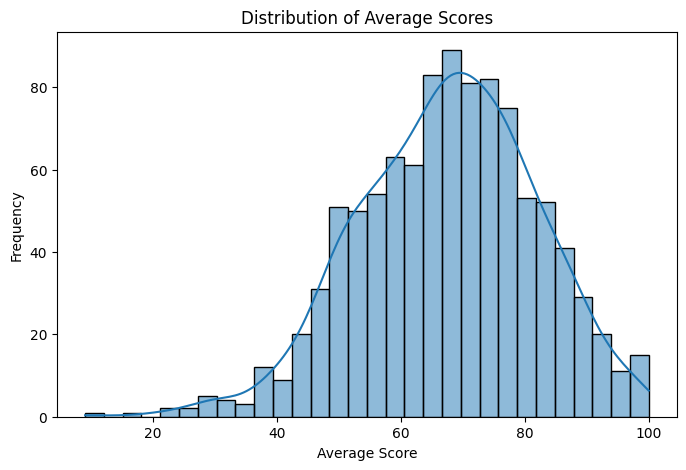

In [ ]:
# Visualize distribution of average score
plt.figure(figsize=(8, 5))
sns.histplot(df['average_score'], bins=30, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

## 3. check outliers

In [ ]:
# Sort 'average_score' in ascending order
df['average_score'].sort_values(ascending=True)

,average_score
59,9
980,18
327,23
596,23
17,26
...,...
712,99
179,99
962,100
916,100


In [ ]:
# Detect and count outliers in numeric columns using the IQR method
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


    print(f"\n Column: {col}")
    print(f"Number of outliers: {len(outliers)}")



 Column: math score
Number of outliers: 8

 Column: reading score
Number of outliers: 6

 Column: writing score
Number of outliers: 5

 Column: average_score
Number of outliers: 9


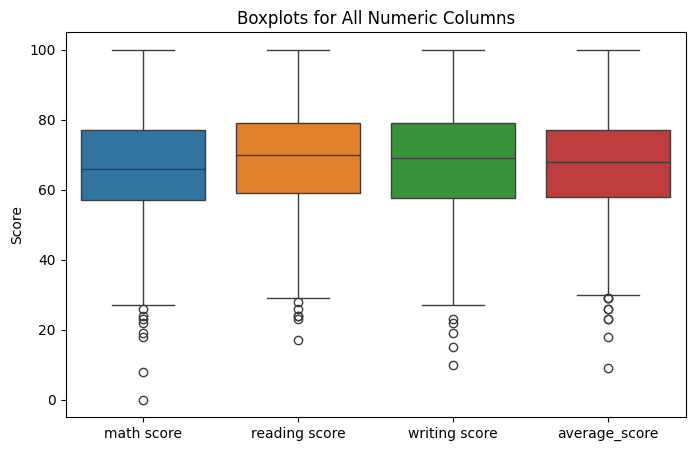

In [ ]:
# Create boxplots for all numeric columns to visualize distributions and outliers
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(8,5))

sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots for All Numeric Columns")
plt.ylabel('Score')

plt.show()


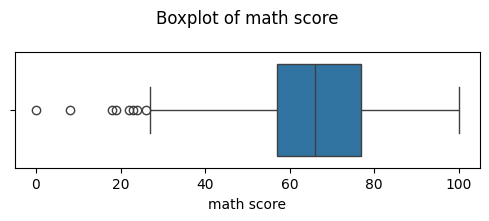

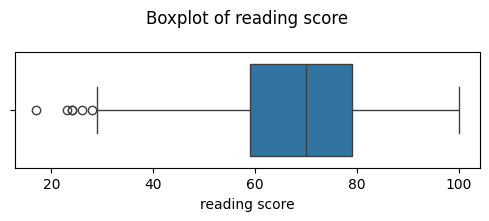

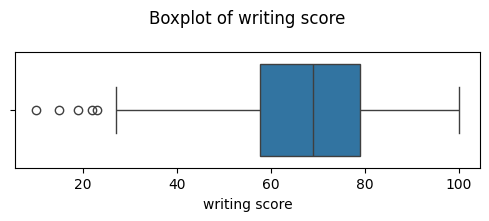

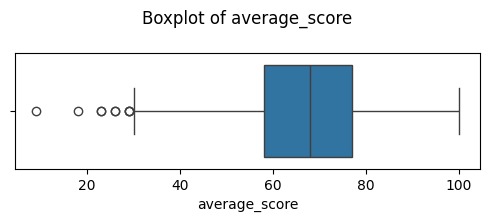

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}\n")
    plt.show()


## 4. visualise correlations

In [ ]:
from scipy.stats import pointbiserialr, f_oneway

# Define target column
target = 'average_score'

# Dictionary of binary variables and their mapping
binary_vars = {
    'gender': {'male': 1, 'female': 0},
    'test preparation course': {'completed': 1, 'none': 0},
    'lunch': {'standard': 1, 'free/reduced': 0}
}

# List of multi-class categorical variables
multi_class_vars = ['parental level of education', 'race/ethnicity']

# --- Binary variables correlation ---
print("Correlation for Binary variables\n")
for col, mapping in binary_vars.items():
    df[col] = df[col].map(mapping)
    r, p = pointbiserialr(df[col], df[target])
    print(f"{col} → Correlation (r): {r:.2f}, p-value: {p:.4f}")

# --- Multi-class variables ANOVA ---
print("\nCorrelation for Multi-class variables\n")
for col in multi_class_vars:
    groups = [df[df[col] == level][target] for level in df[col].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"{col} → F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


Correlation for Binary variables

gender → Correlation (r): -0.13, p-value: 0.0000
test preparation course → Correlation (r): 0.26, p-value: 0.0000
lunch → Correlation (r): 0.29, p-value: 0.0000

Correlation for Multi-class variables

parental level of education → F-statistic: 10.75, p-value: 0.0000
race/ethnicity → F-statistic: 9.10, p-value: 0.0000


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Apply Label Encoding to 'race/ethnicity'
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])

# Apply Label Encoding to 'race/ethnicity'

df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

# Display the first few rows to show the new column
display(df.head())

# Display the mapping of original categories to encoded values
print("\nMapping of 'race/ethnicity' to encoded values:")
for i, item in enumerate(le.classes_):
    print(f"{item}: {i}")

# Display the mapping of original categories to encoded values
print("\nMapping of 'parental level of education' to encoded values:")
for i, item in enumerate(le.classes_):
    print(f"{item}: {i}")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,1,1,0,72,72,74,72
1,0,2,4,1,1,69,90,88,82
2,0,1,3,1,0,90,95,93,92
3,1,0,0,0,0,47,57,44,49
4,1,2,4,1,0,76,78,75,76



Mapping of 'race/ethnicity' to encoded values:
group A: 0
group B: 1
group C: 2
group D: 3
group E: 4

Mapping of 'parental level of education' to encoded values:
group A: 0
group B: 1
group C: 2
group D: 3
group E: 4


### Heatmap

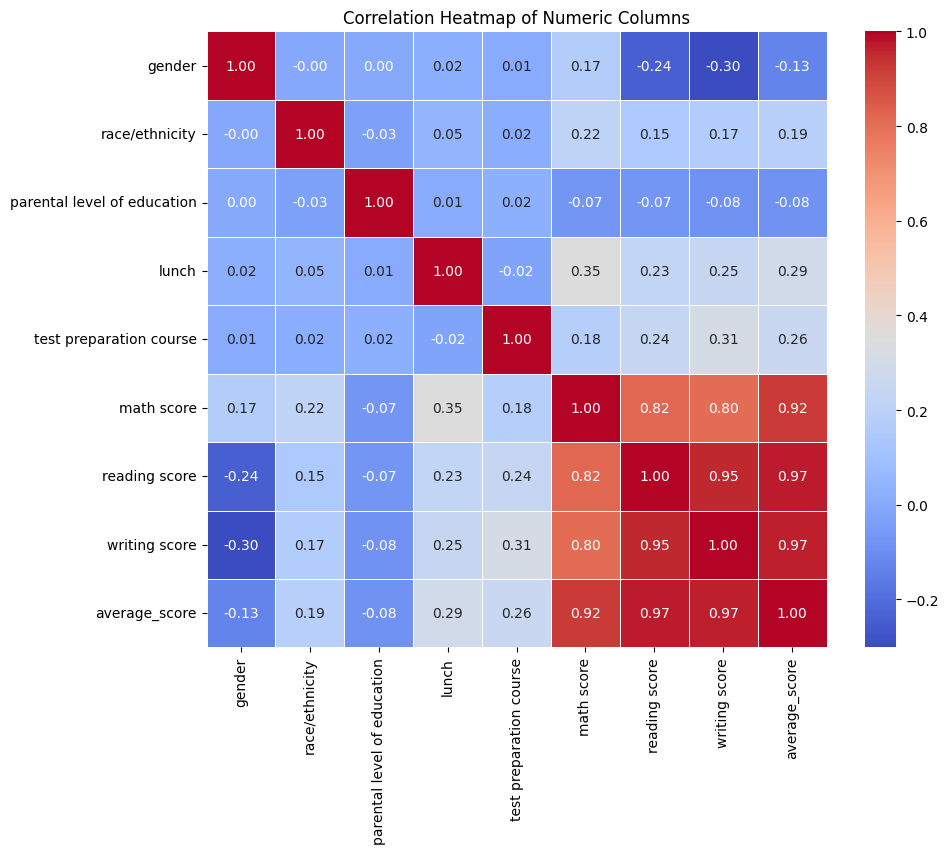

In [ ]:
# Plot a correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

## 5. plot histogram

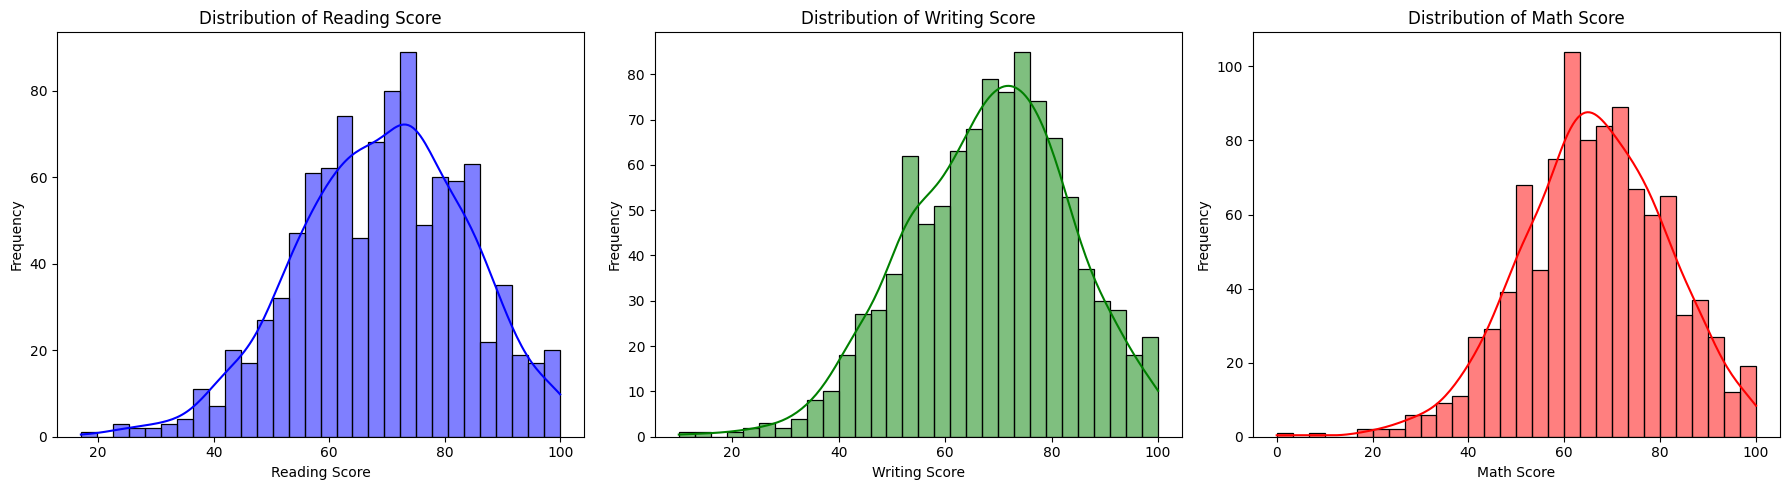

In [ ]:
# Plot distributions of reading, writing, and math scores using histograms with KDE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['reading score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Reading Score')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(df['writing score'], bins=30, kde=True, color='green')
plt.title('Distribution of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')


plt.subplot(1, 3, 3)
sns.histplot(df['math score'], bins=30, kde=True, color='red')
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 4.	visualise the relationship between features (line chart/ pie chart / scatter...etc.)

## 1. Scatter Plot (Numerical vs. Numerical)

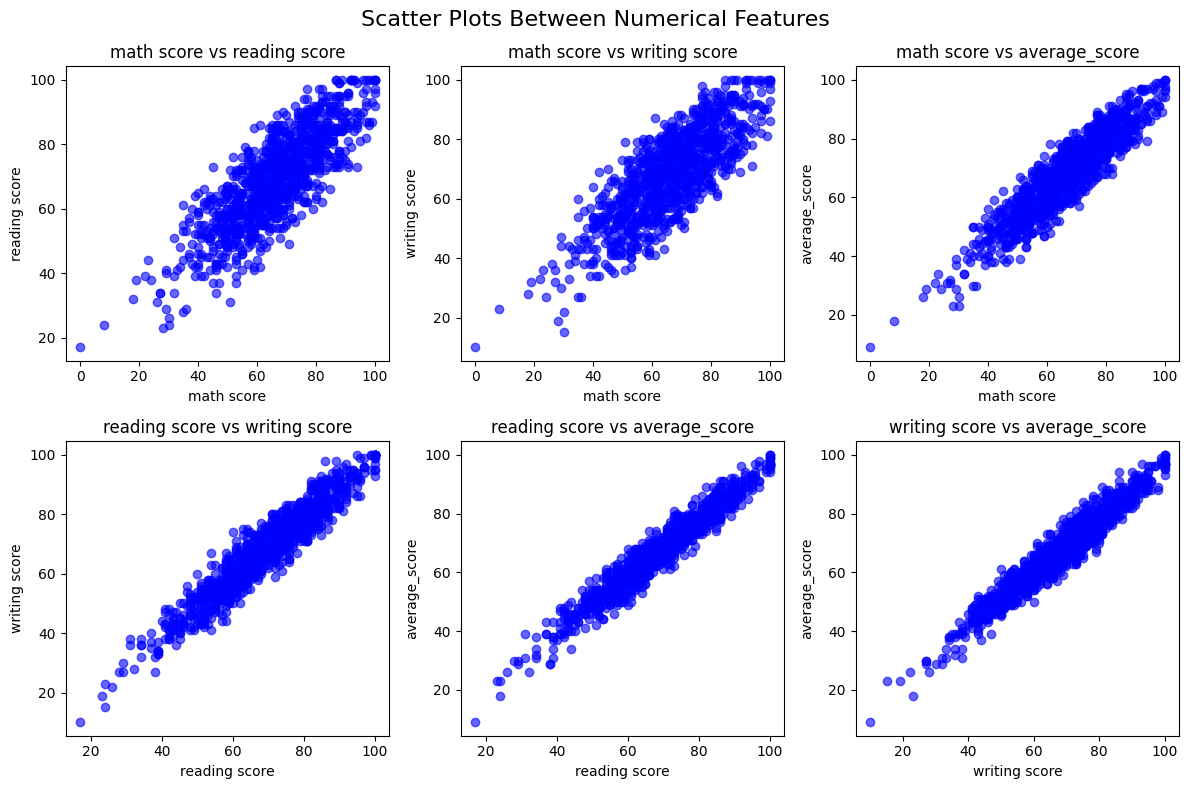

In [ ]:
# Create scatter plots to visualize relationships between numerical features
import matplotlib.pyplot as plt

num_cols = ['math score', 'reading score', 'writing score', 'average_score']


fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Scatter Plots Between Numerical Features", fontsize=16)

combinations = [
    ('math score', 'reading score'),
    ('math score', 'writing score'),
    ('math score', 'average_score'),
    ('reading score', 'writing score'),
    ('reading score', 'average_score'),
    ('writing score', 'average_score'),
]

for ax, (x, y) in zip(axes.flat, combinations):
    ax.scatter(df[x], df[y], alpha=0.6, color='blue')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')

plt.tight_layout()
plt.subplots_adjust
plt.show()


## 2. Bar Plot (Categorical vs. Numerical)

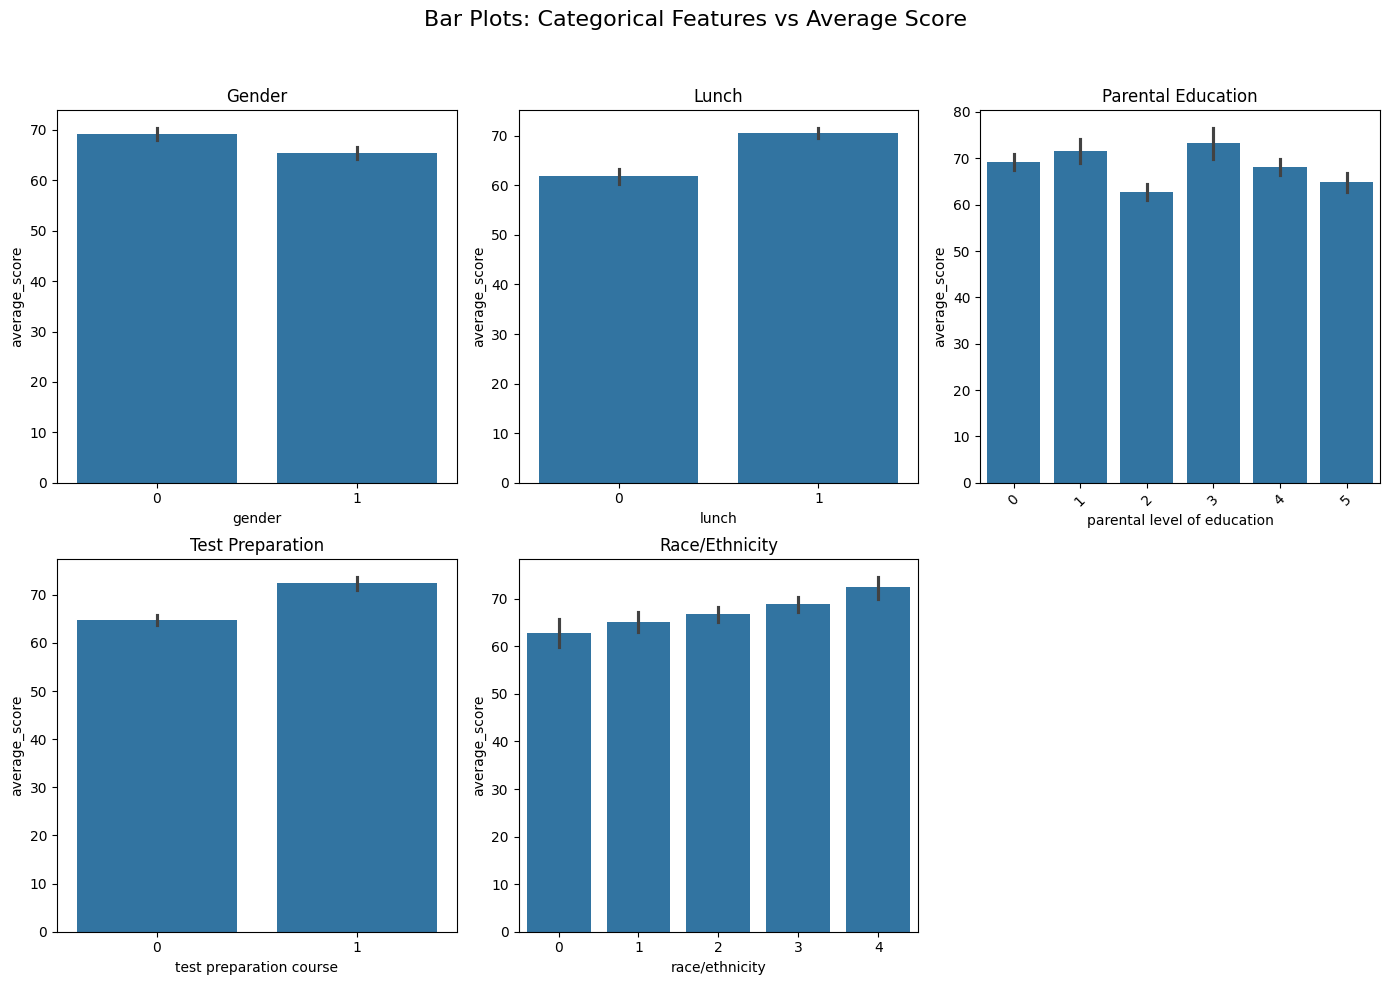

In [ ]:
# Create bar plots to compare categorical features against average score

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(14,10))
fig.suptitle('Bar Plots: Categorical Features vs Average Score', fontsize=16)

sns.barplot(x='gender', y='average_score', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender')

sns.barplot(x='lunch', y='average_score', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Lunch')

sns.barplot(x='parental level of education', y='average_score', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Parental Education')
axes[0, 2].tick_params(axis='x', rotation=45)

sns.barplot(x='test preparation course', y='average_score', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Test Preparation')

sns.barplot(x='race/ethnicity', y='average_score', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Race/Ethnicity')

axes[1, 2].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


## 3. Pie Chart (for category proportions)

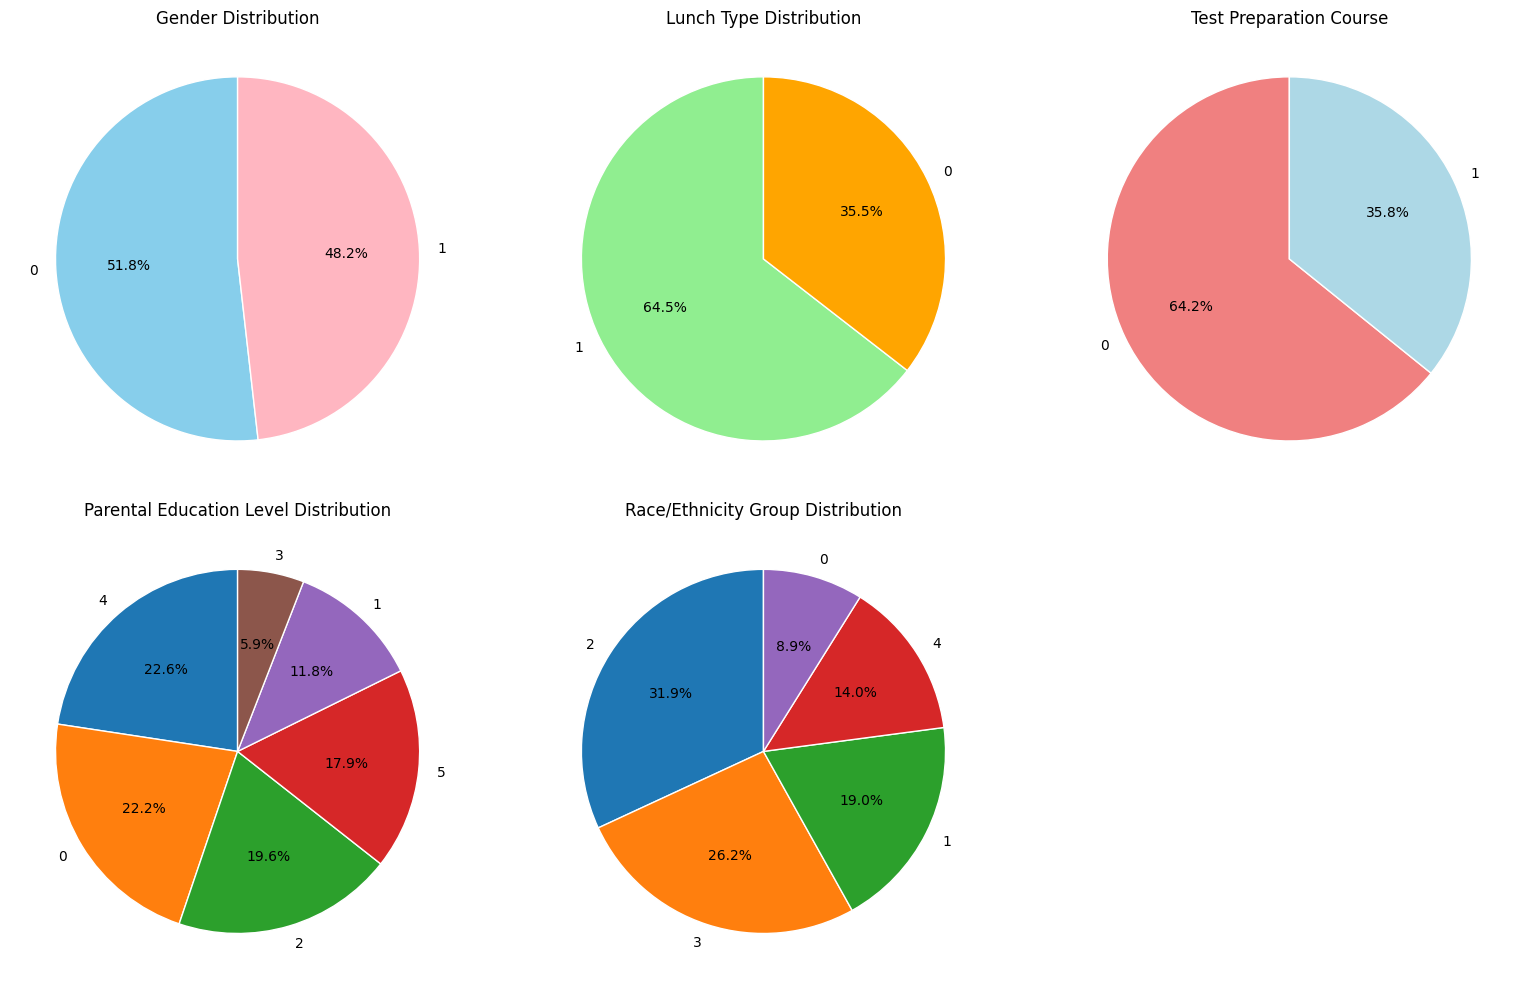

In [ ]:
# Plot pie charts to visualize the distribution of categorical features

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 1)
df['gender'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink'],
    wedgeprops=dict(edgecolor='w'))
plt.title('Gender Distribution')
plt.ylabel('')

plt.subplot(2, 3, 2)
df['lunch'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'],
    wedgeprops=dict(edgecolor='w'))
plt.title('Lunch Type Distribution')
plt.ylabel('')

plt.subplot(2, 3, 3)
df['test preparation course'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'],
    wedgeprops=dict(edgecolor='w'))
plt.title('Test Preparation Course')
plt.ylabel('')

plt.subplot(2, 3, 4)
df['parental level of education'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90,
    wedgeprops=dict(edgecolor='w'))
plt.title('Parental Education Level Distribution')
plt.ylabel('')

plt.subplot(2, 3, 5)
df['race/ethnicity'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90,
    wedgeprops=dict(edgecolor='w'))
plt.title('Race/Ethnicity Group Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
 8   average_score                1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


# 5.	Data cleaning

## 1. Handle missing values

In [ ]:
# Remove rows with missing values

df_clean = df.dropna()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
 8   average_score                1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


## 3. Handle outliers

Shape of DataFrame before removing outliers: (1000, 9)
Shape of DataFrame after removing outliers: (986, 9)


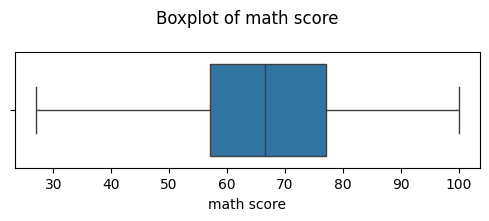

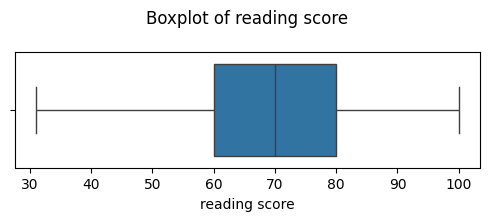

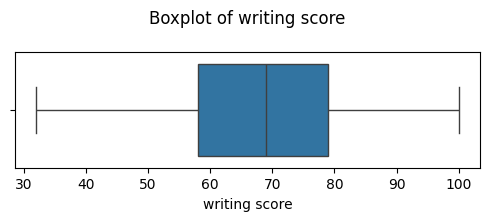

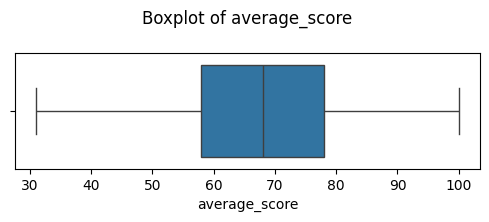

In [ ]:
# Remove outliers from numeric columns using the IQR method and visualize with boxplots

numeric_cols_to_check = ['math score', 'reading score', 'writing score', 'average_score']
df_no_outliers = df.copy()

for col in numeric_cols_to_check:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)

df = df_no_outliers
for col in numeric_cols_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}\n")
    plt.show()

In [ ]:
# Display DataFrame structure, column types, and non-null counts after removing outliers

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       986 non-null    int64
 1   race/ethnicity               986 non-null    int64
 2   parental level of education  986 non-null    int64
 3   lunch                        986 non-null    int64
 4   test preparation course      986 non-null    int64
 5   math score                   986 non-null    int64
 6   reading score                986 non-null    int64
 7   writing score                986 non-null    int64
 8   average_score                986 non-null    int64
dtypes: int64(9)
memory usage: 77.0 KB


In [ ]:
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.483773,2.182556,2.474645,0.651116,0.362069,66.694726,69.723124,68.648073,68.029412
std,0.499990,1.157250,1.830887,0.476859,0.480843,14.340780,13.910716,14.427092,13.467093
min,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,31.000000,32.000000,31.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.000000,60.000000,58.000000,58.000000
50%,0.000000,2.000000,2.000000,1.000000,0.000000,66.500000,70.000000,69.000000,68.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,80.000000,79.000000,78.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000


# 5.	Data preprocessing

## 1. Scalling

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,1,1,0,72,72,74,72
1,0,2,4,1,1,69,90,88,82
2,0,1,3,1,0,90,95,93,92
3,1,0,0,0,0,47,57,44,49
4,1,2,4,1,0,76,78,75,76


In [ ]:
# Standardize numeric columns (mean=0, std=1) using StandardScaler

from sklearn.preprocessing import StandardScaler

numeric_cols = ['math score', 'reading score', 'writing score']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,grade
0,0,1,1,1,0,0.370131,0.163761,0.371152,72,2
1,0,2,4,1,1,0.160831,1.458384,1.342041,82,0
2,0,1,3,1,0,1.625930,1.818002,1.688787,92,1
3,1,0,0,0,0,-1.374034,-0.915092,-1.709324,49,5
4,1,2,4,1,0,0.649197,0.595302,0.440501,76,2


## 2. check target column

In [ ]:
# create grades column based on average_score and display grade distribution

def assign_grade(score):
    if score >= 90:
        return 'A+'
    elif score >= 80:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 50:
        return 'D'
    else:
        return 'F'

df['grade'] = df['average_score'].apply(assign_grade)

print("Grade Distribution:")
print(df['grade'].value_counts())

Grade Distribution:
grade
B     261
C     256
D     182
A     146
F      89
A+     52
Name: count, dtype: int64


In [ ]:
# Encode grade labels into numeric values using LabelEncoder

from sklearn.preprocessing import LabelEncoder
df['grade'] = LabelEncoder().fit_transform(df['grade'])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,grade
0,0,1,1,1,0,0.370131,0.163761,0.371152,72,2
1,0,2,4,1,1,0.160831,1.458384,1.342041,82,0
2,0,1,3,1,0,1.625930,1.818002,1.688787,92,1
3,1,0,0,0,0,-1.374034,-0.915092,-1.709324,49,5
4,1,2,4,1,0,0.649197,0.595302,0.440501,76,2


In [ ]:
# Split dataset into training and testing sets with stratified sampling

from sklearn.model_selection import train_test_split
X = df.drop(columns=['grade'])
y = df['grade']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Apply SMOTE to balance class distribution in the training data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {2: 209, 3: 205, 4: 145, 0: 117, 5: 71, 1: 41}
After SMOTE: {3: 209, 2: 209, 4: 209, 0: 209, 1: 209, 5: 209}


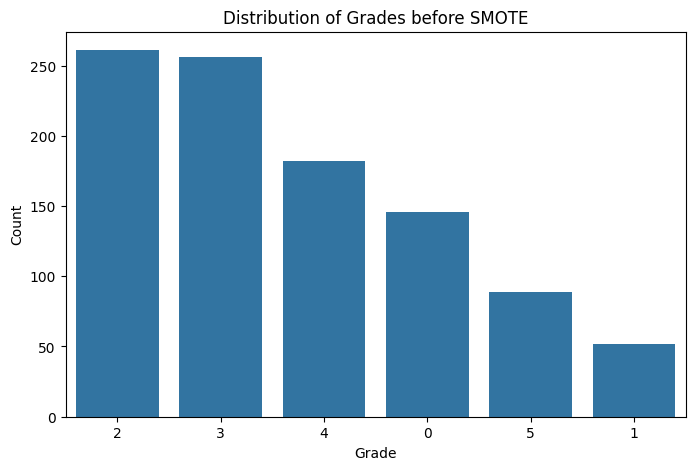

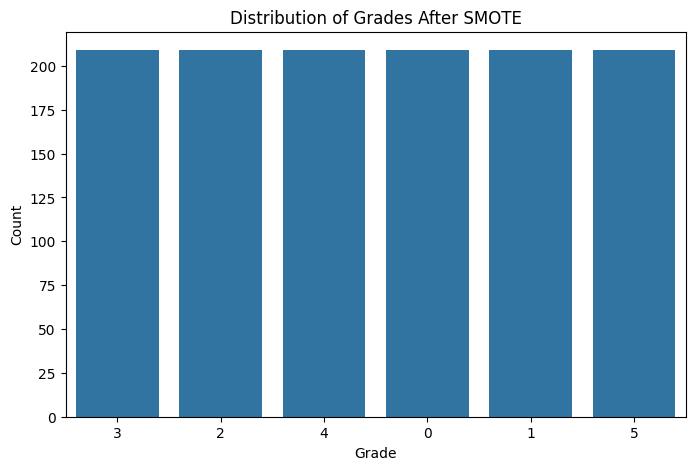

In [ ]:
# Visualize grade distribution before and after applying SMOTE

plt.figure(figsize=(8, 5))
sns.countplot(x=y, order=y.value_counts().index)
plt.title('Distribution of Grades before SMOTE')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_res, order=y_train_res.value_counts().index)
plt.title('Distribution of Grades After SMOTE')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# 6.	Model training, evaluation and testing

## 1. Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

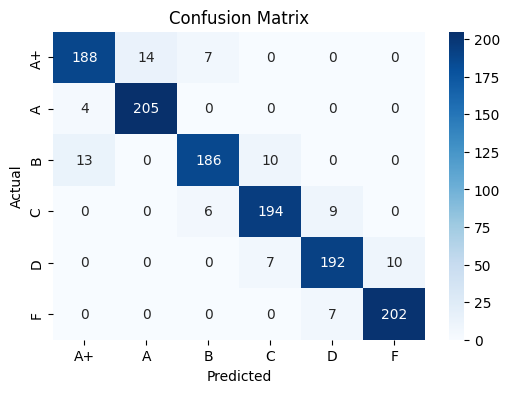

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       209
           1       0.94      0.98      0.96       209
           2       0.93      0.89      0.91       209
           3       0.92      0.93      0.92       209
           4       0.92      0.92      0.92       209
           5       0.95      0.97      0.96       209

    accuracy                           0.93      1254
   macro avg       0.93      0.93      0.93      1254
weighted avg       0.93      0.93      0.93      1254



In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Use StratifiedKFold for balanced cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_lr = cross_val_predict(lr_model, X_train_res, y_train_res, cv=cv)

# Compute confusion matrix
cm = confusion_matrix(y_train_res, y_pred_lr)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A+', 'A', 'B', 'C', 'D', 'F'],
            yticklabels=['A+', 'A', 'B', 'C', 'D', 'F'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n")
log_reg_report = classification_report(y_train_res, y_pred_lr, output_dict=True)
print(classification_report(y_train_res, y_pred_lr))


## 2. Naive Bayes Classifier

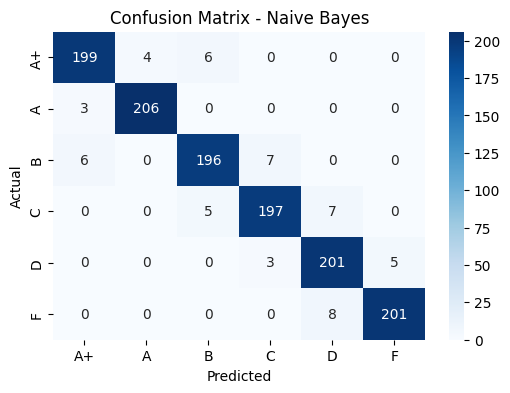

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       209
           1       0.98      0.99      0.98       209
           2       0.95      0.94      0.94       209
           3       0.95      0.94      0.95       209
           4       0.93      0.96      0.95       209
           5       0.98      0.96      0.97       209

    accuracy                           0.96      1254
   macro avg       0.96      0.96      0.96      1254
weighted avg       0.96      0.96      0.96      1254



In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Use StratifiedKFold for balanced cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_nb = cross_val_predict(nb_model, X_train_res, y_train_res, cv=cv)

# Compute confusion matrix
cm = confusion_matrix(y_train_res, y_pred_nb)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A+', 'A', 'B', 'C', 'D', 'F'],
            yticklabels=['A+', 'A', 'B', 'C', 'D', 'F'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Print classification report
print("Classification Report:\n")
nb_report = classification_report(y_train_res, y_pred_nb, output_dict=True)
print(classification_report(y_train_res, y_pred_nb))


## 3. AdaBoost Classifier

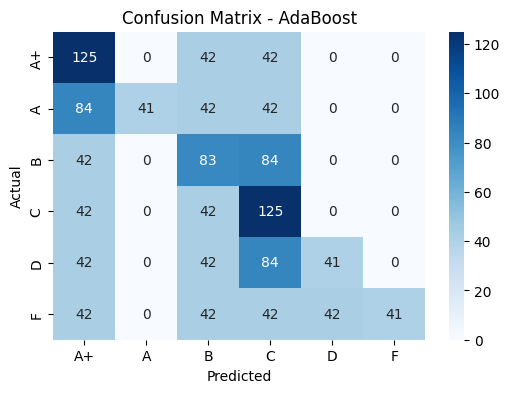

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.60      0.43       209
           1       1.00      0.20      0.33       209
           2       0.28      0.40      0.33       209
           3       0.30      0.60      0.40       209
           4       0.49      0.20      0.28       209
           5       1.00      0.20      0.33       209

    accuracy                           0.36      1254
   macro avg       0.57      0.36      0.35      1254
weighted avg       0.57      0.36      0.35      1254



In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost model with 100 estimators
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Use StratifiedKFold for balanced cross-validation (preserves class distribution in folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_adaboost = cross_val_predict(adaboost_model, X_train_res, y_train_res, cv=cv)

# Compute confusion matrix
cm = confusion_matrix(y_train_res, y_pred_adaboost)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A+', 'A', 'B', 'C', 'D', 'F'],
            yticklabels=['A+', 'A', 'B', 'C', 'D', 'F'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# Print classification report (precision, recall, F1-score, support)
print("Classification Report:\n")
adaboost_report = classification_report(y_train_res, y_pred_adaboost, output_dict=True)
print(classification_report(y_train_res, y_pred_adaboost))


##4. Support Vector Classifier (SVC)

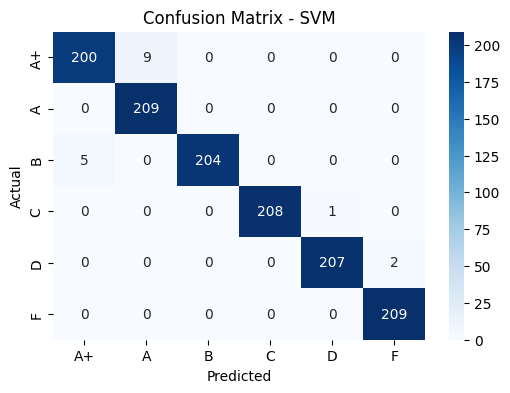

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       209
           1       0.96      1.00      0.98       209
           2       1.00      0.98      0.99       209
           3       1.00      1.00      1.00       209
           4       1.00      0.99      0.99       209
           5       0.99      1.00      1.00       209

    accuracy                           0.99      1254
   macro avg       0.99      0.99      0.99      1254
weighted avg       0.99      0.99      0.99      1254



In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Initialize SVM model with RBF kernel
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Define 5-fold stratified cross-validation (preserves class distribution in folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions (on resampled training set)
y_pred_svc = cross_val_predict(svc_model, X_train_res, y_train_res, cv=cv)

# Generate confusion matrix
cm = confusion_matrix(y_train_res, y_pred_svc)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A+', 'A', 'B', 'C', 'D', 'F'],  # Class labels for predicted axis
            yticklabels=['A+', 'A', 'B', 'C', 'D', 'F'])  # Class labels for actual axis
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Print classification report (precision, recall, f1-score, support)
print("Classification Report:\n")
svc_report = classification_report(y_train_res, y_pred_svc, output_dict=True)  # also stores as dict for later use
print(classification_report(y_train_res, y_pred_svc))  # readable text output


## 5. K-Nearest Neighbors Classifier (KNN)

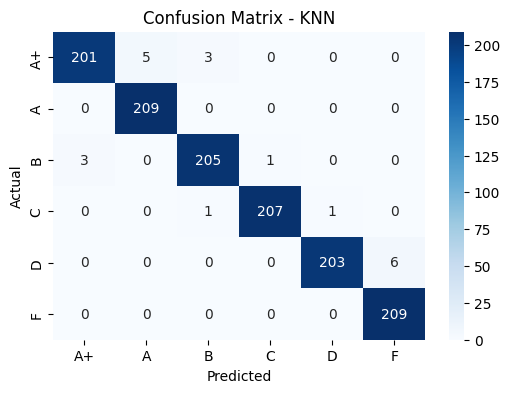

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       209
           1       0.98      1.00      0.99       209
           2       0.98      0.98      0.98       209
           3       1.00      0.99      0.99       209
           4       1.00      0.97      0.98       209
           5       0.97      1.00      0.99       209

    accuracy                           0.98      1254
   macro avg       0.98      0.98      0.98      1254
weighted avg       0.98      0.98      0.98      1254



In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Define 5-fold stratified cross-validation (preserves class distribution in folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions for each sample
y_pred_knn = cross_val_predict(knn_model, X_train_res, y_train_res, cv=cv)

# Compute confusion matrix between actual and predicted labels
cm = confusion_matrix(y_train_res, y_pred_knn)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A+', 'A', 'B', 'C', 'D', 'F'],   # predicted labels
            yticklabels=['A+', 'A', 'B', 'C', 'D', 'F'])   # actual labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# Print classification report (precision, recall, f1-score)
print("Classification Report:\n")
knn_report = classification_report(y_train_res, y_pred_knn, output_dict=True)  # dictionary form
print(classification_report(y_train_res, y_pred_knn))  # readable text form


#8.  Result comparison

## Comparison of  all Models Accuracies

/tmp/ipython-input-718352428.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')


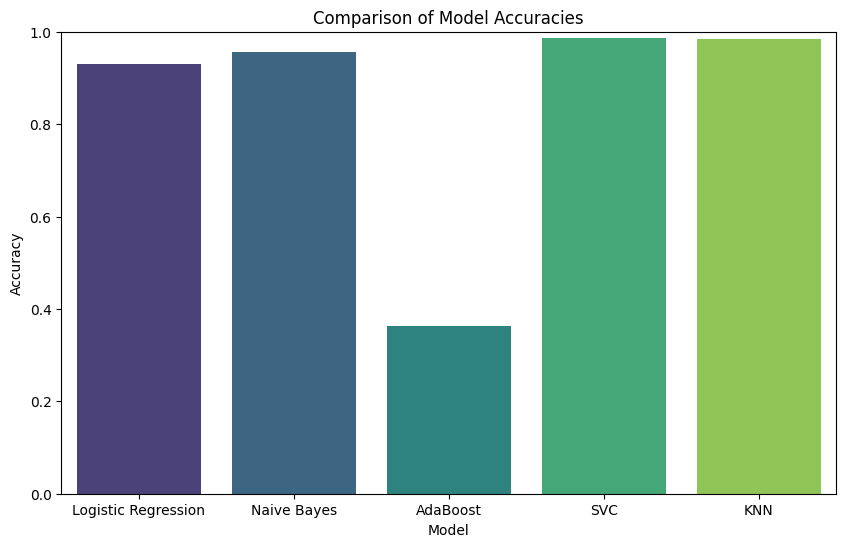

In [ ]:
# Create a dictionary to store model accuracies
model_accuracies = {}

# Extract accuracy scores from classification reports with error handling
if isinstance(log_reg_report, dict) and 'accuracy' in log_reg_report:
    model_accuracies['Logistic Regression'] = log_reg_report['accuracy']
else:
    print("Warning: Could not retrieve accuracy for Logistic Regression.")

if isinstance(nb_report, dict) and 'accuracy' in nb_report:
    model_accuracies['Naive Bayes'] = nb_report['accuracy']
else:
    print("Warning: Could not retrieve accuracy for Naive Bayes.")

if isinstance(adaboost_report, dict) and 'accuracy' in adaboost_report:
    model_accuracies['AdaBoost'] = adaboost_report['accuracy']
else:
    print("Warning: Could not retrieve accuracy for AdaBoost.")

if isinstance(svc_report, dict) and 'accuracy' in svc_report:
    model_accuracies['SVC'] = svc_report['accuracy']
else:
    print("Warning: Could not retrieve accuracy for SVC.")

if isinstance(knn_report, dict) and 'accuracy' in knn_report:
    model_accuracies['KNN'] = knn_report['accuracy']
else:
    print("Warning: Could not retrieve accuracy for KNN.")

# Create a bar chart if there are any valid accuracies
if model_accuracies:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='viridis')
    plt.title('Comparison of Model Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()
else:
    print("No valid model accuracies to display.")

## Comparison of recall for All Classes Across Models

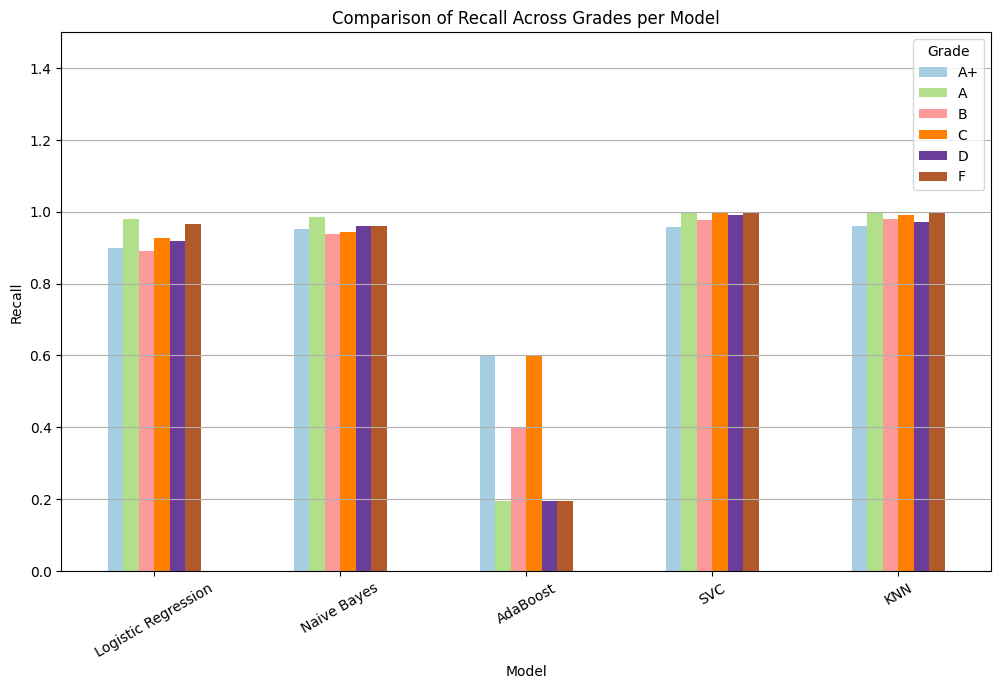

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract recall for each class for all models
class_labels = ['A+', 'A', 'B', 'C', 'D', 'F']
model_names = ['Logistic Regression', 'Naive Bayes', 'AdaBoost', 'SVC', 'KNN']
reports = [log_reg_report, nb_report, adaboost_report, svc_report, knn_report]

recall_data = {}
for grade_idx, grade in enumerate(class_labels):
    recall_data[grade] = []
    for report in reports:
        if isinstance(report, dict):
            recall_data[grade].append(report.get(str(grade_idx), {}).get('recall', 0))
        else:
            recall_data[grade].append(0)

# Now models on X-axis and grades as legend
df_recall = pd.DataFrame(recall_data, index=model_names)

# Plot grouped bar chart
df_recall.plot(kind='bar', figsize=(12, 7), colormap='Paired')
plt.title('Comparison of Recall Across Grades per Model')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1.5)
plt.xticks(rotation=30)
plt.legend(title='Grade')
plt.grid(axis='y')
plt.show()


## Comparison of precision for All Classes Across Models

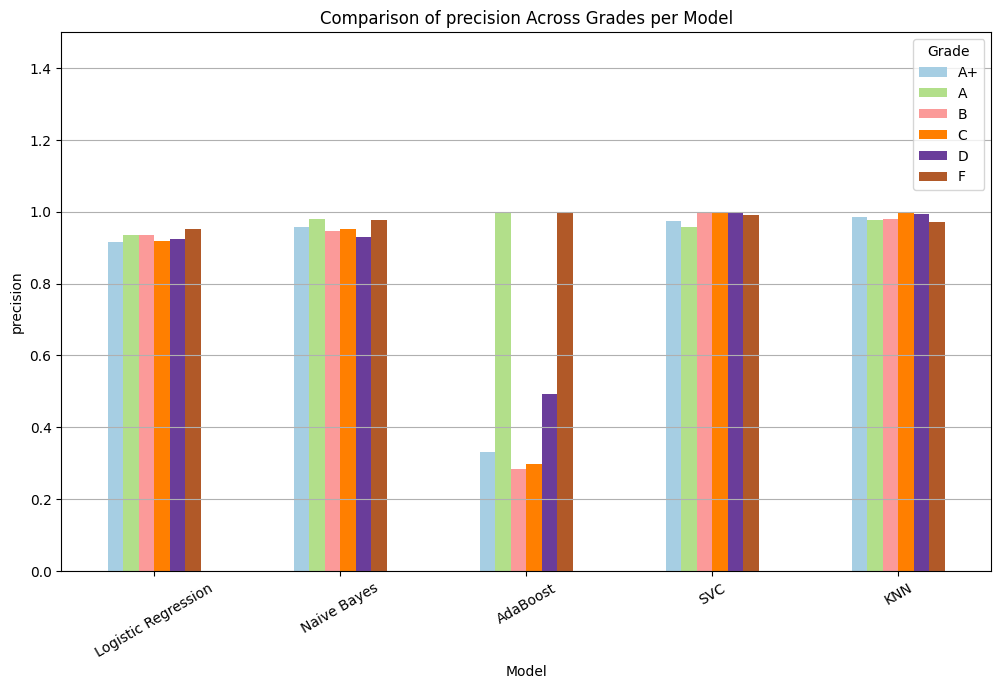

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract precision for each class for all models
class_labels = ['A+', 'A', 'B', 'C', 'D', 'F']
model_names = ['Logistic Regression', 'Naive Bayes', 'AdaBoost', 'SVC', 'KNN']
reports = [log_reg_report, nb_report, adaboost_report, svc_report, knn_report]

precision_data = {}
for grade_idx, grade in enumerate(class_labels):
    precision_data[grade] = []
    for report in reports:
        if isinstance(report, dict):
            precision_data[grade].append(report.get(str(grade_idx), {}).get('precision', 0))
        else:
            precision_data[grade].append(0)

# Now models on X-axis and grades as legend
df_precision = pd.DataFrame(precision_data, index=model_names)

# Plot grouped bar chart
df_precision.plot(kind='bar', figsize=(12, 7), colormap='Paired')
plt.title('Comparison of precision Across Grades per Model')
plt.xlabel('Model')
plt.ylabel('precision')
plt.ylim(0, 1.5)
plt.xticks(rotation=30)
plt.legend(title='Grade')
plt.grid(axis='y')
plt.show()


## Comparison of F1 Scores for All Classes Across Models

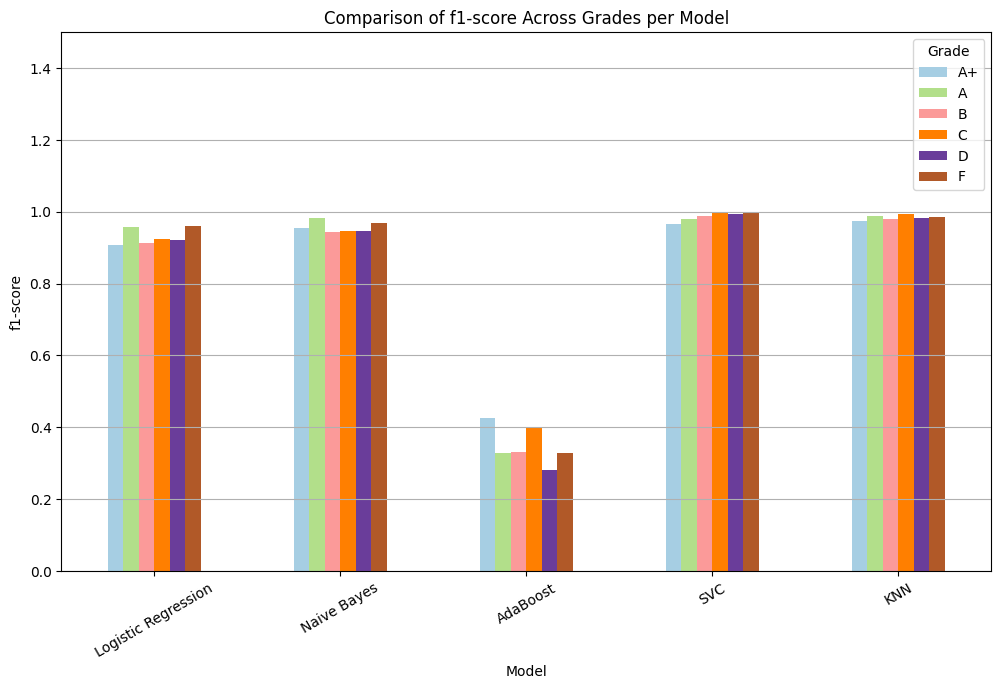

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract f1-score for each class for all models
class_labels = ['A+', 'A', 'B', 'C', 'D', 'F']
model_names = ['Logistic Regression', 'Naive Bayes', 'AdaBoost', 'SVC', 'KNN']
reports = [log_reg_report, nb_report, adaboost_report, svc_report, knn_report]

f1_score_data = {}
for grade_idx, grade in enumerate(class_labels):
    f1_score_data[grade] = []
    for report in reports:
        if isinstance(report, dict):
            f1_score_data[grade].append(report.get(str(grade_idx), {}).get('f1-score', 0))
        else:
            f1_score_data[grade].append(0)

# Now models on X-axis and grades as legend
df_f1_score = pd.DataFrame(f1_score_data, index=model_names)

# Plot grouped bar chart
df_f1_score.plot(kind='bar', figsize=(12, 7), colormap='Paired')
plt.title('Comparison of f1-score Across Grades per Model')
plt.xlabel('Model')
plt.ylabel('f1-score')
plt.ylim(0, 1.5)
plt.xticks(rotation=30)
plt.legend(title='Grade')
plt.grid(axis='y')
plt.show()
